In [1]:
##### November 2019
##### World Bank Analysis - Western Europe Nov 2019 - Data Science: Python
##### by David Rubio and team - MSc Business Analytics
##### Hult International Business School

In [2]:
# importing packages
import pandas as pd # data science essentials
import numpy as np # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.linear_model import LinearRegression # data visualization

# specifying a file (must be in the working directory)
file = 'XXXXX' #USE YOUR OWN PATH

# reading the file into Python through pandas
WE = pd.read_excel(file)

In [3]:
# printing info related to each feature (i.e. column)
print(WE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 70 columns):
Country Code                                                                                                  22 non-null object
Country Name                                                                                                  22 non-null object
Hult Region                                                                                                   22 non-null object
Cool Name                                                                                                     22 non-null object
Access to electricity (% of population)                                                                       22 non-null int64
Access to electricity, rural (% of rural population)                                                          22 non-null int64
Access to electricity, urban (% of urban population)                                                          22 non-null int

In [4]:
# printing descriptive statistics for feature
print(WE.describe().round(2))
X = WE.describe().round(2)

       Access to electricity (% of population)  \
count                                     22.0   
mean                                     100.0   
std                                        0.0   
min                                      100.0   
25%                                      100.0   
50%                                      100.0   
75%                                      100.0   
max                                      100.0   

       Access to electricity, rural (% of rural population)  \
count                                               22.0      
mean                                               100.0      
std                                                  0.0      
min                                                100.0      
25%                                                100.0      
50%                                                100.0      
75%                                                100.0      
max                                          

In [5]:
# Detecting Missing Values

In [6]:
# method chaining!
WE.isnull().any()

Country Code                                False
Country Name                                False
Hult Region                                 False
Cool Name                                   False
Access to electricity (% of population)     False
                                            ...  
Urban population (% of total population)     True
Urban population growth (annual %)           True
Type of healthcare system                   False
Refugee population                           True
Political stability                          True
Length: 70, dtype: bool

In [7]:
# method chaining!
WE.isnull().sum()

Country Code                                0
Country Name                                0
Hult Region                                 0
Cool Name                                   0
Access to electricity (% of population)     0
                                           ..
Urban population (% of total population)    1
Urban population growth (annual %)          1
Type of healthcare system                   0
Refugee population                          5
Political stability                         5
Length: 70, dtype: int64

In [8]:
# display the number of missing values as a percentage of total observations (in decimal format)
WE.iloc[0:10, : ].isnull().sum()/len(WE.iloc[0:10, : ])

Country Code                                0.0
Country Name                                0.0
Hult Region                                 0.0
Cool Name                                   0.0
Access to electricity (% of population)     0.0
                                           ... 
Urban population (% of total population)    0.0
Urban population growth (annual %)          0.0
Type of healthcare system                   0.0
Refugee population                          0.3
Political stability                         0.2
Length: 70, dtype: float64

In [9]:
WE_1 = WE.isnull().sum()
WE_1 = WE_1 / WE_1.sum()
print(WE_1)

Country Code                                0.000000
Country Name                                0.000000
Hult Region                                 0.000000
Cool Name                                   0.000000
Access to electricity (% of population)     0.000000
                                              ...   
Urban population (% of total population)    0.002370
Urban population growth (annual %)          0.002370
Type of healthcare system                   0.000000
Refugee population                          0.011848
Political stability                         0.011848
Length: 70, dtype: float64


In [10]:
WE.isnull().mean()

Country Code                                0.000000
Country Name                                0.000000
Hult Region                                 0.000000
Cool Name                                   0.000000
Access to electricity (% of population)     0.000000
                                              ...   
Urban population (% of total population)    0.045455
Urban population growth (annual %)          0.045455
Type of healthcare system                   0.000000
Refugee population                          0.227273
Political stability                         0.227273
Length: 70, dtype: float64

In [11]:
# Flagging Missing Values

In [12]:
file = 'WDIW Dataset (Nov.2)_Original.xlsx'
pd.read_excel(file)

# re-reading in the dataset
WE = pd.read_excel(file)

for col in WE:
    
    if WE[col].isnull().any() > 0:
        WE['m_' + col] = WE[col].isnull().astype(int)
        
# saving changes to dataset    
WE.to_excel('WE_with_flags_Original.xlsx',
                index = False)

# reloading data
file = 'WE_with_flags_Original.xlsx'
pd.read_excel(file)

Country Code               Country Name     Hult Region Cool Name  \
0           AUT                    Austria  Western Europe   Jetfire   
1           BEL                    Belgium  Western Europe   Jetfire   
2           DNK                    Denmark  Western Europe   Jetfire   
3           FRO              Faroe Islands  Western Europe   Jetfire   
4           FRA                     France  Western Europe   Jetfire   
5           DEU                    Germany  Western Europe   Jetfire   
6           GIB                  Gibraltar  Western Europe   Jetfire   
7           GRL                  Greenland  Western Europe   Jetfire   
8           ISL                    Iceland  Western Europe   Jetfire   
9           IRL                    Ireland  Western Europe   Jetfire   
10          IMN                Isle of Man  Western Europe   Jetfire   
11          ITA                      Italy  Western Europe   Jetfire   
12          LIE              Liechtenstein  Western Europe   Jetfire   
13          LUX                 Luxembourg  Western Europe   Jetfire   
14          MCO                     Monaco  Western Europe   Jetfire   
15          NLD                Netherlands  Western Europe   Jetfire   
16          PRT                   Portugal  Western Europe   Jetfire   
17          SXM  Sint Maarten (Dutch part)  Western Europe   Jetfire   
18          ESP                      Spain  Western Europe   Jetfire   
19          MAF   St. Martin (French part)  Western Europe   Jetfire   
20          CHE                Switzerland  Western Europe   Jetfire   
21          GBR             United Kingdom  Western Europe   Jetfire   

    Access to electricity (% of population)  \
0                                       100   
1                                       100   
2                                       100   
3                                       100   
4                                       100   
5                                       100   
6                                       100   
7                                       100   
8                                       100   
9                                       100   
10                                      100   
11                                      100   
12                                      100   
13                                      100   
14                                      100   
15                                      100   
16                                      100   
17                                      100   
18                                      100   
19                                      100   
20                                      100   
21                                      100   

    Access to electricity, rural (% of rural population)  \
0                                                 100      
1                                                 100      
2                                                 100      
3                                                 100      
4                                                 100      
5                                                 100      
6                                                 100      
7                                                 100      
8                                                 100      
9                                                 100      
10                                                100      
11                                                100      
12                                                100      
13                                                100      
14                                                100      
15                                                100      
16                                                100      
17                                                100      
18                                                100      
19                                                100      
20  

In [13]:
# checking to see if the new solution worked
print(WE.info(null_counts = True,
                  verbose = False))

# making a more formal check
a = WE.isnull().sum().sum()
b = WE.iloc[ : , -95: ].sum().sum()

if a == b:
    print('\nAll missing values accounted for.')
else:
    print('\nSome missing values may be unaccounted for, please audit.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 125 entries, Country Code to m_Political stability
dtypes: float64(61), int32(55), int64(5), object(4)
memory usage: 16.9+ KB
None

Some missing values may be unaccounted for, please audit.


In [14]:
# Correlation Matrix

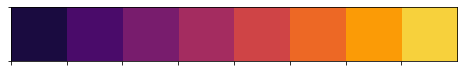

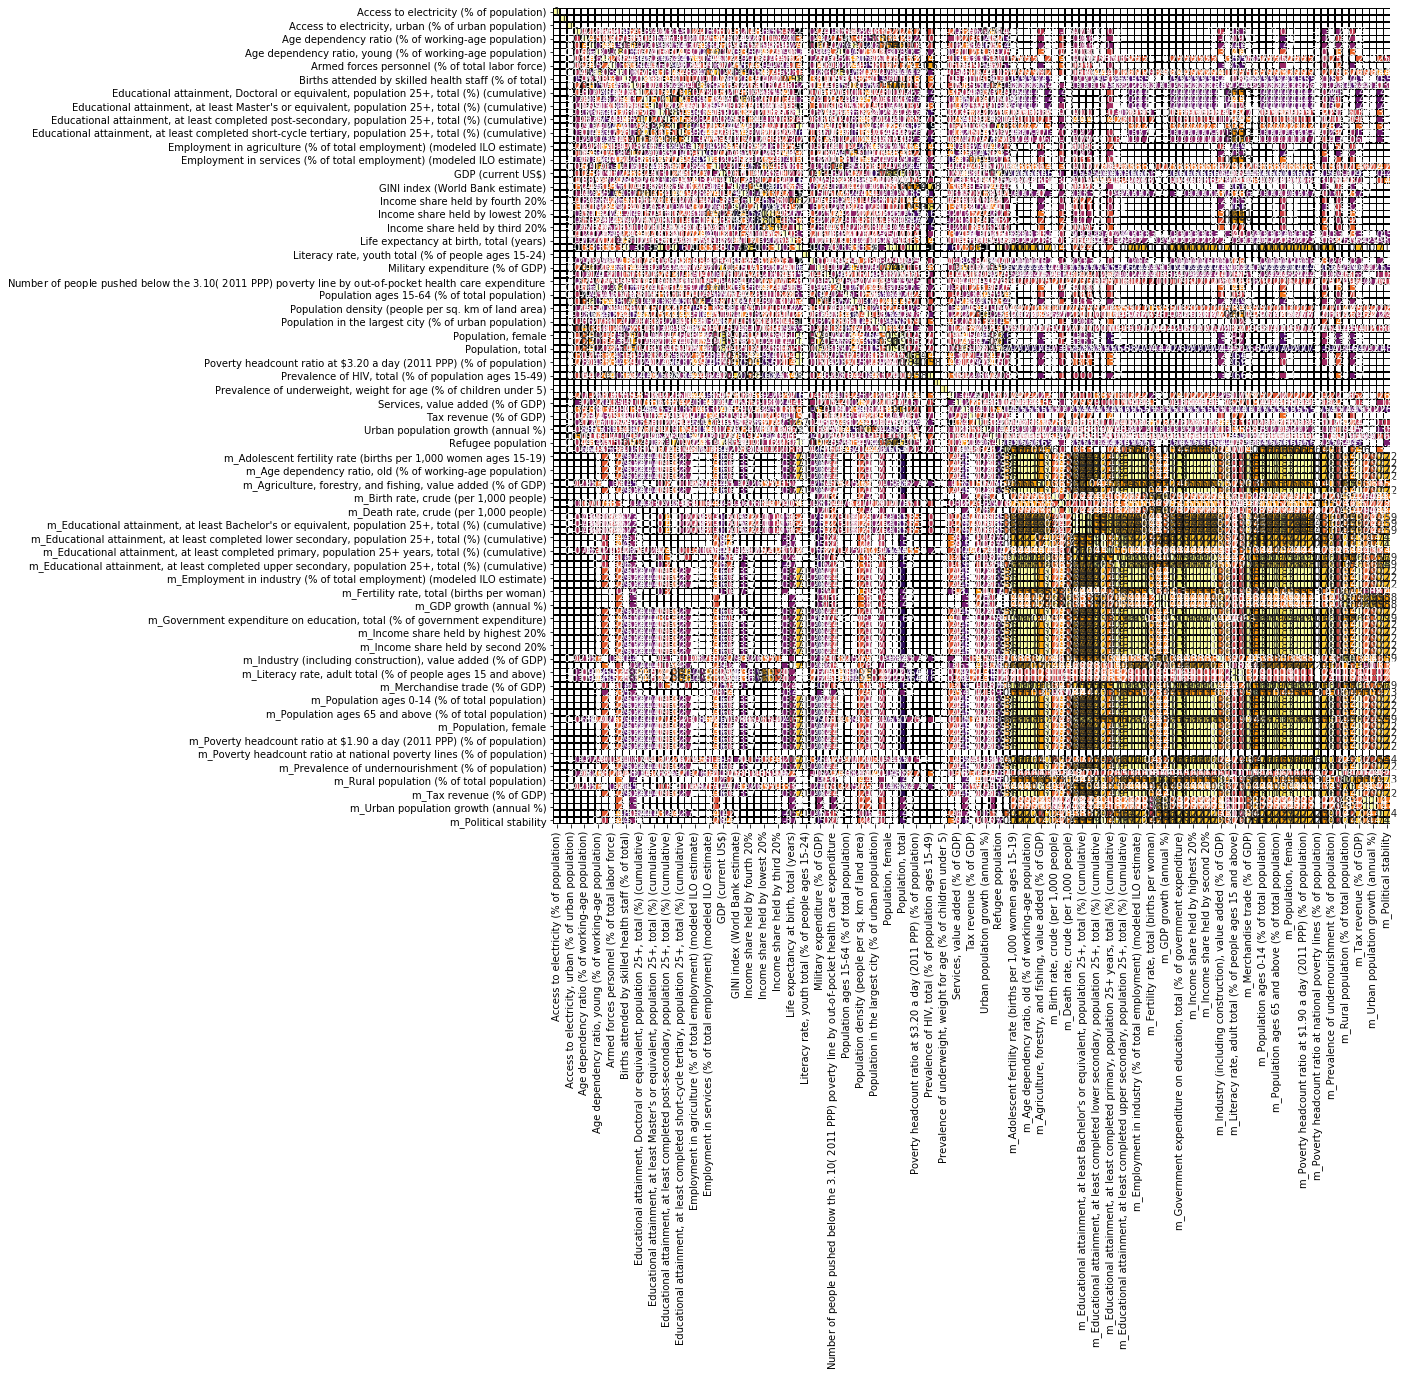

In [15]:
# Using palplot to view a color scheme
WE_corr = WE.corr(method ='kendall')
sns.palplot(sns.color_palette('inferno', 8))

# specifying plot size
fig, ax = plt.subplots(figsize=(15, 15))


# creating a heatmap
sns.heatmap(data = WE_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('WE_Original Correlation Heatmap.png')
plt.show()

In [16]:
# Drop the columns which have more than 9 missing values, AND columns which have the same values

In [17]:
# specifying a file (must be in the working directory)
file = 'WDIW Dataset (Nov.2)_Original.xlsx'

# reading the file into Python through pandas
WE = pd.read_excel(file)

WE = WE.drop(["Cool Name", 
              "Hult Region",
              "Access to electricity (% of population)",
              "Access to electricity, rural (% of rural population)",
              "Access to electricity, urban (% of urban population)",
              "Births attended by skilled health staff (% of total)",
              "Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",
              "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
              "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
              "Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",
              "Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)",
              "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)",
              "Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",
              "Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",
              "Literacy rate, adult total (% of people ages 15 and above)",
              "Literacy rate, youth total (% of people ages 15-24)",
              "Population in the largest city (% of urban population)",
              "Population living in slums (% of urban population)",
              "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
              "Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)",
              "Poverty headcount ratio at national poverty lines (% of population)",
              "Prevalence of HIV, total (% of population ages 15-49)",
              "Prevalence of undernourishment (% of population)",
              "Prevalence of underweight, weight for age (% of children under 5)"], axis = 1)
WE.to_excel('WE AFTER Drop.xlsx', index = False)

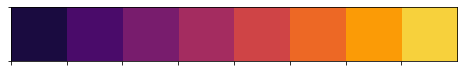

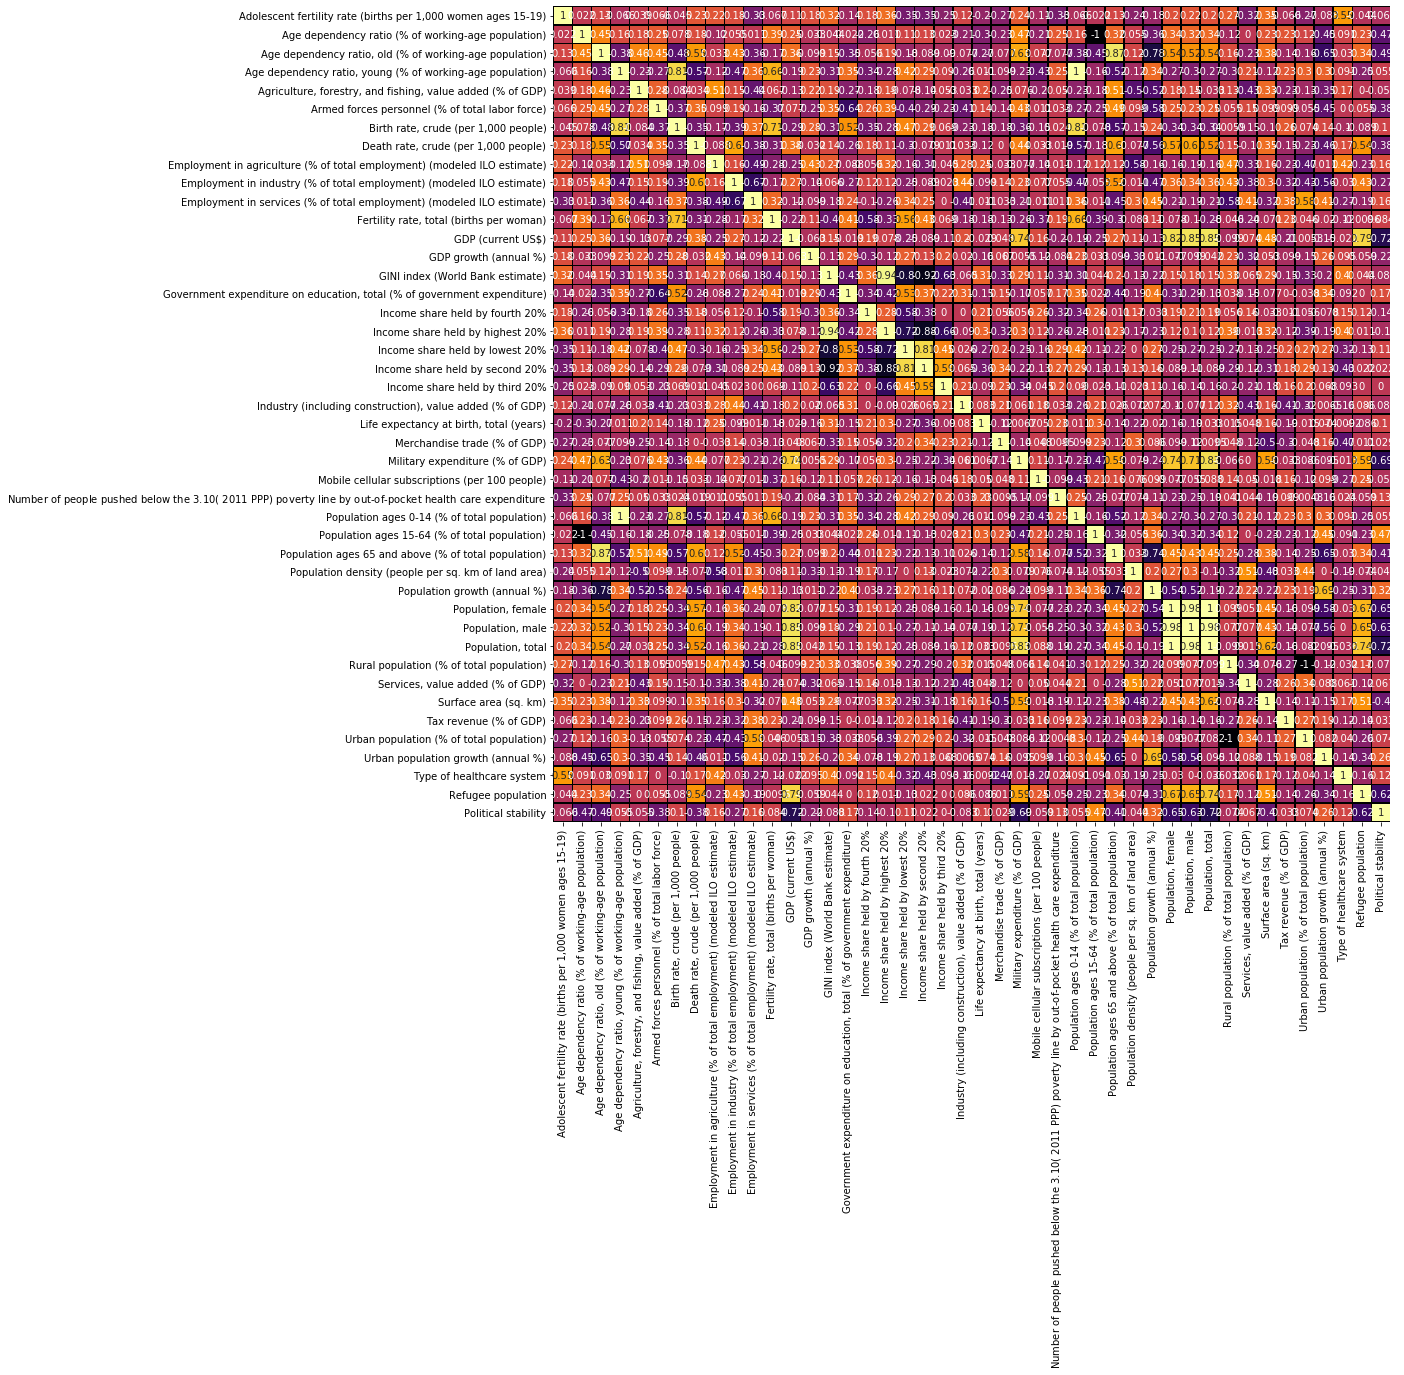

In [18]:
# Using palplot to view a color scheme
WE_corr = WE.corr(method ='kendall')
sns.palplot(sns.color_palette('inferno', 8))

# specifying plot size
fig, ax = plt.subplots(figsize=(15, 15))


# creating a heatmap
sns.heatmap(data = WE_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('WE_After_Dropping Correlation Heatmap.png')
plt.show()

In [19]:
WE.isnull().sum()

Country Code                                                                                                  0
Country Name                                                                                                  0
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                 8
Age dependency ratio (% of working-age population)                                                            8
Age dependency ratio, old (% of working-age population)                                                       8
Age dependency ratio, young (% of working-age population)                                                     8
Agriculture, forestry, and fishing, value added (% of GDP)                                                    6
Armed forces personnel (% of total labor force)                                                               8
Birth rate, crude (per 1,000 people)                                                                    

In [20]:
# Imputing Missing Values

In [21]:
# the following code makes the new DataFrame independent
df_dropped = pd.DataFrame.copy(WE)

# see Footnote 3 for a breakdown of the code above


# using dropna() for df_dropped
df_dropped = df_dropped.dropna().round(2)

# see Footnote 4 for a breakdown of the code above


# checking to see if all missing values have been dropped
print(df_dropped.isnull().sum().sum())


0


C:\Users\isabe\New Folder\lib\site-packages\numpy\lib\histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\isabe\New Folder\lib\site-packages\numpy\lib\histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\isabe\New Folder\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\isabe\New Folder\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


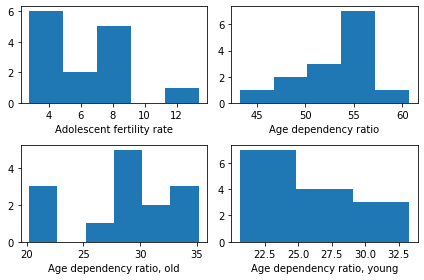

In [22]:
# plotting results

# specifying subplots with subplot()
plt.subplot(2, 2, 1) 
plt.hist(x    = 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
         data = WE,
         bins = 'fd')

plt.xlabel('Adolescent fertility rate')


plt.subplot(2, 2, 2 ) 
plt.hist(x    = 'Age dependency ratio (% of working-age population)',
         data = WE,
         bins = 'fd')

plt.xlabel('Age dependency ratio')

plt.subplot(2, 2, 3) 
plt.hist(x    = 'Age dependency ratio, old (% of working-age population)',
         data = WE,
         bins = 'fd')

plt.xlabel('Age dependency ratio, old')

plt.subplot(2, 2, 4) 
plt.hist(x    = 'Age dependency ratio, young (% of working-age population)',
         data = WE,
         bins = 'fd')

plt.xlabel('Age dependency ratio, young')


# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
plt.show()



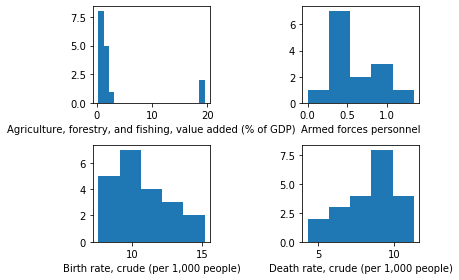

In [23]:
# plotting results

# specifying subplots with subplot()
plt.subplot(2, 2, 1)
plt.hist(x    = 'Agriculture, forestry, and fishing, value added (% of GDP)',
         data = WE,
         bins = 'fd')

plt.xlabel('Agriculture, forestry, and fishing, value added (% of GDP)')

plt.subplot(2, 2, 2)
plt.hist(x    = 'Armed forces personnel (% of total labor force)',
         data = WE,
         bins = 'fd')

plt.xlabel('Armed forces personnel')

plt.subplot(2, 2, 3)
plt.hist(x    = 'Birth rate, crude (per 1,000 people)',
         data = WE,
         bins = 'fd')

plt.xlabel('Birth rate, crude (per 1,000 people)')

plt.subplot(2, 2, 4)
plt.hist(x    = 'Death rate, crude (per 1,000 people)',
         data = WE,
         bins = 'fd')

plt.xlabel('Death rate, crude (per 1,000 people)')

# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
plt.show()


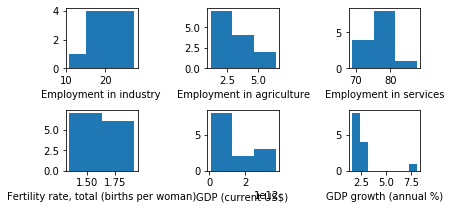

In [24]:
# plotting results

# specifying subplots with subplot()
plt.subplot(3, 3, 1)
plt.hist(x    = 'Employment in industry (% of total employment) (modeled ILO estimate)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Employment in industry ')

plt.subplot(3, 3, 2) 
plt.hist('Employment in agriculture (% of total employment) (modeled ILO estimate)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Employment in agriculture')


# Services Employment
plt.subplot(3, 3, 3) # bottom-left plot
plt.hist('Employment in services (% of total employment) (modeled ILO estimate)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Employment in services')


# Fertility Rate
plt.subplot(3, 3, 4) # bottom-right plot
plt.hist('Fertility rate, total (births per woman)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Fertility rate, total (births per woman)')



plt.subplot(3, 3, 5) # GDP (current US$)
plt.hist(x    = 'GDP (current US$)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('GDP (current US$) ')


# color
plt.subplot(3, 3, 6) # GDP growth (annual %)
plt.hist('GDP growth (annual %)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('GDP growth (annual %)')

# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
plt.show()

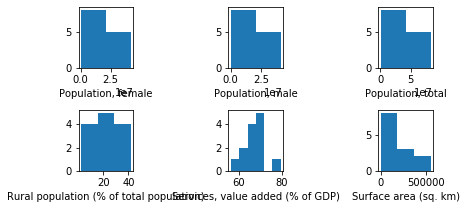

In [26]:
# plotting results

# specifying subplots with subplot()

# Population, female
plt.subplot(3, 3, 1)
plt.hist(x    = 'Population, female',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population, female')


# Population, male
plt.subplot(3, 3, 2)
plt.hist('Population, male',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population, male')


# Population, total
plt.subplot(3, 3, 3)
plt.hist('Population, total',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population, total')


# Rural population (% of total population)
plt.subplot(3, 3, 4)
plt.hist('Rural population (% of total population)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Rural population (% of total population)')

# Services, value added (% of GDP)
plt.subplot(3, 3, 5)
plt.hist(x    = 'Services, value added (% of GDP)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Services, value added (% of GDP)')


# Surface area (sq. km)
plt.subplot(3, 3, 6)
plt.hist('Surface area (sq. km)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Surface area (sq. km)')

# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
plt.show()


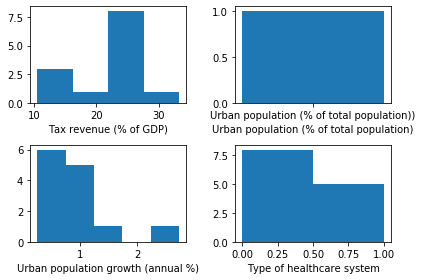

In [27]:
# Tax revenue (% of GDP)
plt.subplot(2, 2, 1)
plt.hist('Tax revenue (% of GDP)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Tax revenue (% of GDP)')


# Urban population (% of total population)
plt.subplot(2, 2, 2)
plt.hist('Urban population (% of total population))',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Urban population (% of total population)')

# Urban population growth (annual %)
plt.subplot(2, 2, 3)
plt.hist(x    = 'Urban population growth (annual %)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Urban population growth (annual %)')


# Type of healthcare system
plt.subplot(2, 2, 4)
plt.hist('Type of healthcare system',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Type of healthcare system')


# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
plt.show()

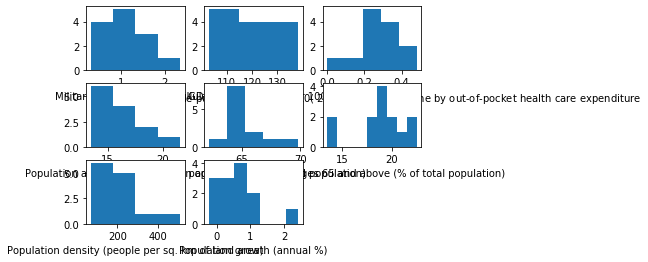

In [28]:
# Military expenditure (% of GDP)
plt.subplot(3, 3, 1)
plt.hist(x    = 'Military expenditure (% of GDP)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Military expenditure (% of GDP) ')


# Mobile cellular subscriptions (per 100 people)
plt.subplot(3, 3, 2) # Mobile cellular subscriptions (per 100 people)
plt.hist('Mobile cellular subscriptions (per 100 people)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Mobile cellular subscriptions (per 100 people)')


# Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure
plt.subplot(3, 3, 3)
plt.hist('Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure')


# Population ages 0-14 (% of total population)
plt.subplot(3, 3, 4)
plt.hist('Population ages 0-14 (% of total population)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population ages 0-14 (% of total population)')


# Population ages 15-64 (% of total population)
plt.subplot(3, 3, 5)
plt.hist(x    = 'Population ages 15-64 (% of total population)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population ages 15-64 (% of total population) ')


# Population ages 65 and above (% of total population)
plt.subplot(3, 3, 6)
plt.hist('Population ages 65 and above (% of total population)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population ages 65 and above (% of total population)')


# Population density (people per sq. km of land area)
plt.subplot(3, 3, 7)
plt.hist('Population density (people per sq. km of land area)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population density (people per sq. km of land area)')


# Population growth (annual %)
plt.subplot(3, 3, 8)
plt.hist('Population growth (annual %)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Population growth (annual %)')

# displaying the plot

plt.show()

Text(0.5, 0, 'Merchandise trade (% of GDP)')

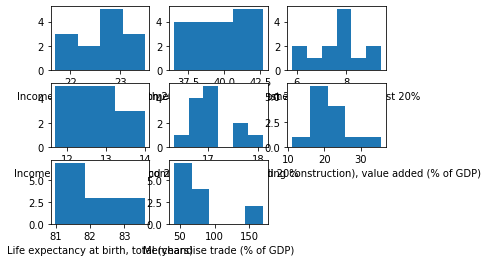

In [29]:
# plotting results

# specifying subplots with subplot()

# Income share held by fourth 20%
plt.subplot(3, 3, 1) # top-left plot
plt.hist(x    = 'Income share held by fourth 20%',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Income share held by fourth 20%')


# Income share held by highest 20%
plt.subplot(3, 3, 2) # top-right plot
plt.hist('Income share held by highest 20%',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Income share held by highest 20%')


# Income share held by lowest 20%
plt.subplot(3, 3, 3) # bottom-left plot
plt.hist('Income share held by lowest 20%',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Income share held by lowest 20%')


# Income share held by second 20%
plt.subplot(3, 3, 4) # bottom-right plot
plt.hist('Income share held by second 20%',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Income share held by second 20%')

# Income share held by third 20%
plt.subplot(3, 3, 5) # bottom-right plot
plt.hist('Income share held by third 20%',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Income share held by third 20%')

# Industry (including construction), value added (% of GDP)
plt.subplot(3, 3, 6) # bottom-right plot
plt.hist('Industry (including construction), value added (% of GDP)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Industry (including construction), value added (% of GDP)')

# Life expectancy at birth, total (years)
plt.subplot(3, 3, 7) # bottom-right plot
plt.hist('Life expectancy at birth, total (years)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Life expectancy at birth, total (years)')

# Merchandise trade (% of GDP)
plt.subplot(3, 3, 8) # bottom-right plot
plt.hist('Merchandise trade (% of GDP)',
         data = df_dropped,
         bins = 'fd')

plt.xlabel('Merchandise trade (% of GDP)')

In [30]:
# specifying a file (must be in the working directory)
file = 'WE AFTER Drop.xlsx'

# reading the file into Python through pandas
WE = pd.read_excel(file)

# soft coding median for columns
Adolescent_fill                               = WE['Adolescent fertility rate (births per 1,000 women ages 15-19)'].median()
ADR_fill                                      = WE['Age dependency ratio (% of working-age population)'].median()
ADROld_fill                                   = WE['Age dependency ratio, old (% of working-age population)'].median()
ADRYoung_fill                                 = WE['Age dependency ratio, young (% of working-age population)'].median()
AFF_fill                                      = WE['Agriculture, forestry, and fishing, value added (% of GDP)'].median()
ArmedForce_fill                               = WE['Armed forces personnel (% of total labor force)'].median()
BirthRate_fill                                = WE['Birth rate, crude (per 1,000 people)'].median()
DeathRate_fill                                = WE['Death rate, crude (per 1,000 people)'].median()
AGRIEmployment_fill                           = WE['Employment in agriculture (% of total employment) (modeled ILO estimate)'].median()
INDUSEmployment_fill                          = WE['Employment in industry (% of total employment) (modeled ILO estimate)'].median()
SERVEmployment_fill                           = WE['Employment in services (% of total employment) (modeled ILO estimate)'].median()
Fertility_rate_total_births_per_woman_fill    = WE['Fertility rate, total (births per woman)'].median()
GDP_current_US_fill                           = WE['GDP (current US$)'].median()
GDP_growth_annual_fill                        = WE['GDP growth (annual %)'].median()
GINI_index_World_Bank_estimate_fill           = WE['GINI index (World Bank estimate)'].median()
Government_expenditure_on_education_fill      = WE['Government expenditure on education, total (% of government expenditure)'].median()
Income_share_held_by_fourth_20_fill           = WE['Income share held by fourth 20%'].median()
Income_share_held_by_highest_20_fill          = WE['Income share held by highest 20%'].median()
Income_share_held_by_lowest_20_fill           = WE['Income share held by lowest 20%'].median()
Income_share_held_by_second_20_fill           = WE['Income share held by second 20%'].median()
Income_share_held_by_third_20_fill            = WE['Income share held by third 20%'].median()
Industry_including_construction_fill          = WE['Industry (including construction), value added (% of GDP)'].median()
lifeexp_fill                                  = WE['Life expectancy at birth, total (years)'].median()
merchandiset_fill                             = WE['Merchandise trade (% of GDP)'].median()
military_fill                                 = WE['Military expenditure (% of GDP)'].median()
mobile_fill                                   = WE['Mobile cellular subscriptions (per 100 people)'].median()
poverty310_fill                               = WE['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'].median()
popchild_fill                                 = WE['Population ages 0-14 (% of total population)'].median()
popyoung_fill                                 = WE['Population ages 15-64 (% of total population)'].median()
popold_fill                                   = WE['Population ages 65 and above (% of total population)'].median()
popdens_fill                                  = WE['Population density (people per sq. km of land area)'].median()
popgrowth_fill                                = WE['Population growth (annual %)'].median()
PopulationFemale_fill                         = WE['Population, female'].median()
PopulationMale_fill                           = WE['Population, male'].median()
RuralPopulation_fill                          = WE['Rural population (% of total population)'].median()
Services_fill                                 = WE['Services, value added (% of GDP)'].median()
SurfaceArea_fill                              = WE['Surface area (sq. km)'].median()
TaxRevenue_fill                               = WE['Tax revenue (% of GDP)'].median()
UrbanPopulation_fill                          = WE['Urban population (% of total population)'].median()
UrbanPopulationGrowth_fill                    = WE['Urban population growth (annual %)'].median()
RefugeePopulation_fill                        = WE['Refugee population'].median()
PoliticalStability_fill                       = WE['Political stability'].median()

# filling columns NAs with median
WE["Adolescent fertility rate (births per 1,000 women ages 15-19)"]                                              = WE["Adolescent fertility rate (births per 1,000 women ages 15-19)"].fillna(Adolescent_fill).round(2)
WE["Age dependency ratio (% of working-age population)"]                                                         = WE["Age dependency ratio (% of working-age population)"].fillna(ADR_fill).round(2)
WE["Age dependency ratio, old (% of working-age population)"]                                                    = WE["Age dependency ratio, old (% of working-age population)"].fillna(ADROld_fill).round(2)
WE["Age dependency ratio, young (% of working-age population)"]                                                  = WE["Age dependency ratio, young (% of working-age population)"].fillna(ADRYoung_fill).round(2)
WE["Agriculture, forestry, and fishing, value added (% of GDP)"]                                                 = WE["Agriculture, forestry, and fishing, value added (% of GDP)"].fillna(AFF_fill).round(2)
WE["Armed forces personnel (% of total labor force)"]                                                            = WE["Armed forces personnel (% of total labor force)"].fillna(ArmedForce_fill).round(2)
WE["Birth rate, crude (per 1,000 people)"]                                                                       = WE["Birth rate, crude (per 1,000 people)"].fillna(BirthRate_fill).round(2)
WE["Death rate, crude (per 1,000 people)"]                                                                       = WE["Death rate, crude (per 1,000 people)"].fillna(DeathRate_fill).round(2)
WE["Employment in agriculture (% of total employment) (modeled ILO estimate)"]                                   = WE["Employment in agriculture (% of total employment) (modeled ILO estimate)"].fillna(AGRIEmployment_fill).round(2)
WE["Employment in industry (% of total employment) (modeled ILO estimate)"]                                      = WE["Employment in industry (% of total employment) (modeled ILO estimate)"].fillna(INDUSEmployment_fill).round(2)
WE["Employment in services (% of total employment) (modeled ILO estimate)"]                                      = WE["Employment in services (% of total employment) (modeled ILO estimate)"].fillna(SERVEmployment_fill).round(2)
WE['Fertility rate, total (births per woman)']                                                                   = WE['Fertility rate, total (births per woman)'].fillna(Fertility_rate_total_births_per_woman_fill).round(2)
WE['GDP (current US$)']                                                                                          = WE['GDP (current US$)'].fillna(GDP_current_US_fill).round(2)
WE['GDP growth (annual %)']                                                                                      = WE['GDP growth (annual %)'].fillna(GDP_growth_annual_fill ).round(2)
WE['GINI index (World Bank estimate)']                                                                           = WE['GINI index (World Bank estimate)'].fillna(GINI_index_World_Bank_estimate_fill).round(2)
WE['Government expenditure on education, total (% of government expenditure)']                                   = WE['Government expenditure on education, total (% of government expenditure)'].fillna(Government_expenditure_on_education_fill).round(2)
WE['Income share held by fourth 20%']                                                                            = WE['Income share held by fourth 20%'].fillna(Income_share_held_by_fourth_20_fill).round(2)
WE['Income share held by highest 20%']                                                                           = WE['Income share held by highest 20%'].fillna(Income_share_held_by_highest_20_fill).round(2)
WE['Income share held by lowest 20%']                                                                            = WE['Income share held by lowest 20%'].fillna(Income_share_held_by_lowest_20_fill).round(2)
WE['Income share held by second 20%']                                                                            = WE['Income share held by second 20%'].fillna(Income_share_held_by_second_20_fill).round(2)
WE['Income share held by third 20%']                                                                             = WE['Income share held by third 20%'].fillna(Income_share_held_by_third_20_fill).round(2)
WE['Industry (including construction), value added (% of GDP)']                                                  = WE['Industry (including construction), value added (% of GDP)'].fillna(Industry_including_construction_fill).round(2)
WE['Life expectancy at birth, total (years)']                                                                    = WE['Life expectancy at birth, total (years)'].fillna(lifeexp_fill).round(2)
WE['Merchandise trade (% of GDP)']                                                                               = WE['Merchandise trade (% of GDP)'].fillna(merchandiset_fill).round(2)
WE['Military expenditure (% of GDP)']                                                                            = WE['Military expenditure (% of GDP)'].fillna(military_fill).round(2)
WE['Mobile cellular subscriptions (per 100 people)']                                                             = WE['Mobile cellular subscriptions (per 100 people)'].fillna(mobile_fill).round(2)
WE['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'] = WE['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'].fillna(poverty310_fill).round(2)
WE['Population ages 0-14 (% of total population)']                                                               = WE['Population ages 0-14 (% of total population)'].fillna(popchild_fill).round(2)
WE['Population ages 15-64 (% of total population)']                                                              = WE['Population ages 15-64 (% of total population)'].fillna(popyoung_fill).round(2)
WE['Population ages 65 and above (% of total population)']                                                       = WE['Population ages 65 and above (% of total population)'].fillna(popold_fill).round(2)
WE['Population density (people per sq. km of land area)']                                                        = WE['Population density (people per sq. km of land area)'].fillna(popdens_fill).round(2)
WE['Population growth (annual %)']                                                                               = WE['Population growth (annual %)'].fillna(popgrowth_fill).round(2)
WE['Population, female']                                                                                         = WE['Population, female'].fillna(PopulationFemale_fill).round(2)
WE['Population, male']                                                                                           = WE['Population, male'].fillna(PopulationMale_fill).round(2)
WE['Rural population (% of total population)']                                                                   = WE['Rural population (% of total population)'].fillna(RuralPopulation_fill).round(2)
WE['Services, value added (% of GDP)']                                                                           = WE['Services, value added (% of GDP)'].fillna(Services_fill).round(2)
WE['Surface area (sq. km)']                                                                                      = WE['Surface area (sq. km)'].fillna(SurfaceArea_fill).round(2)
WE['Tax revenue (% of GDP)']                                                                                     = WE['Tax revenue (% of GDP)'].fillna(TaxRevenue_fill).round(2)         
WE['Urban population (% of total population)']                                                                   = WE['Urban population (% of total population)'].fillna(UrbanPopulation_fill).round(2)
WE['Urban population growth (annual %)']                                                                         = WE['Urban population growth (annual %)'].fillna(UrbanPopulationGrowth_fill).round(2)
WE['Refugee population']                                                                                         = WE['Refugee population'].fillna(RefugeePopulation_fill).round(2)
WE['Political stability']                                                                                        = WE['Political stability'].fillna(PoliticalStability_fill).round(2)

# checking to make sure NAs are filled in
print(WE['Adolescent fertility rate (births per 1,000 women ages 15-19)'].isnull().any())
print(WE['Age dependency ratio (% of working-age population)'].isnull().any())
print(WE['Age dependency ratio, old (% of working-age population)'].isnull().any())
print(WE['Age dependency ratio, young (% of working-age population)'].isnull().any())
print(WE['Agriculture, forestry, and fishing, value added (% of GDP)'].isnull().any())
print(WE['Armed forces personnel (% of total labor force)'].isnull().any())
print(WE['Birth rate, crude (per 1,000 people)'].isnull().any())
print(WE['Death rate, crude (per 1,000 people)'].isnull().any())
print(WE['Employment in agriculture (% of total employment) (modeled ILO estimate)'].isnull().any())
print(WE['Employment in industry (% of total employment) (modeled ILO estimate)'].isnull().any())
print(WE['Employment in services (% of total employment) (modeled ILO estimate)'].isnull().any())
print(WE['Fertility rate, total (births per woman)'].isnull().any())
print(WE['GDP (current US$)'].isnull().any())
print(WE['GDP growth (annual %)'].isnull().any())
print(WE['GINI index (World Bank estimate)'].isnull().any())
print(WE['Government expenditure on education, total (% of government expenditure)'].isnull().any())
print(WE['Income share held by fourth 20%'].isnull().any())
print(WE['Income share held by highest 20%'].isnull().any())
print(WE['Income share held by lowest 20%'].isnull().any())
print(WE['Income share held by second 20%'].isnull().any())
print(WE['Income share held by third 20%'].isnull().any())
print(WE['Industry (including construction), value added (% of GDP)'].isnull().any())
print(WE['Life expectancy at birth, total (years)'].isnull().any())
print(WE['Merchandise trade (% of GDP)'].isnull().any())
print(WE['Military expenditure (% of GDP)'].isnull().any())
print(WE['Mobile cellular subscriptions (per 100 people)'].isnull().any())
print(WE['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'].isnull().any())
print(WE['Population ages 0-14 (% of total population)'].isnull().any())
print(WE['Population ages 15-64 (% of total population)'].isnull().any())
print(WE['Population ages 65 and above (% of total population)'].isnull().any())
print(WE['Population density (people per sq. km of land area)'].isnull().any())
print(WE['Population growth (annual %)'].isnull().any())
print(WE['Population, female'].isnull().any())
print(WE['Population, male'].isnull().any())
print(WE['Rural population (% of total population)'].isnull().any())
print(WE['Services, value added (% of GDP)'].isnull().any())
print(WE['Surface area (sq. km)'].isnull().any())
print(WE['Tax revenue (% of GDP)'].isnull().any())
print(WE['Urban population (% of total population)'].isnull().any())
print(WE['Urban population growth (annual %)'].isnull().any())
print(WE['Refugee population'].isnull().any())
print(WE['Political stability'].isnull().any())

WE.to_excel('WE_AFTER_Imputation.xlsx', index = False)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


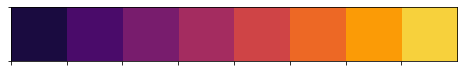

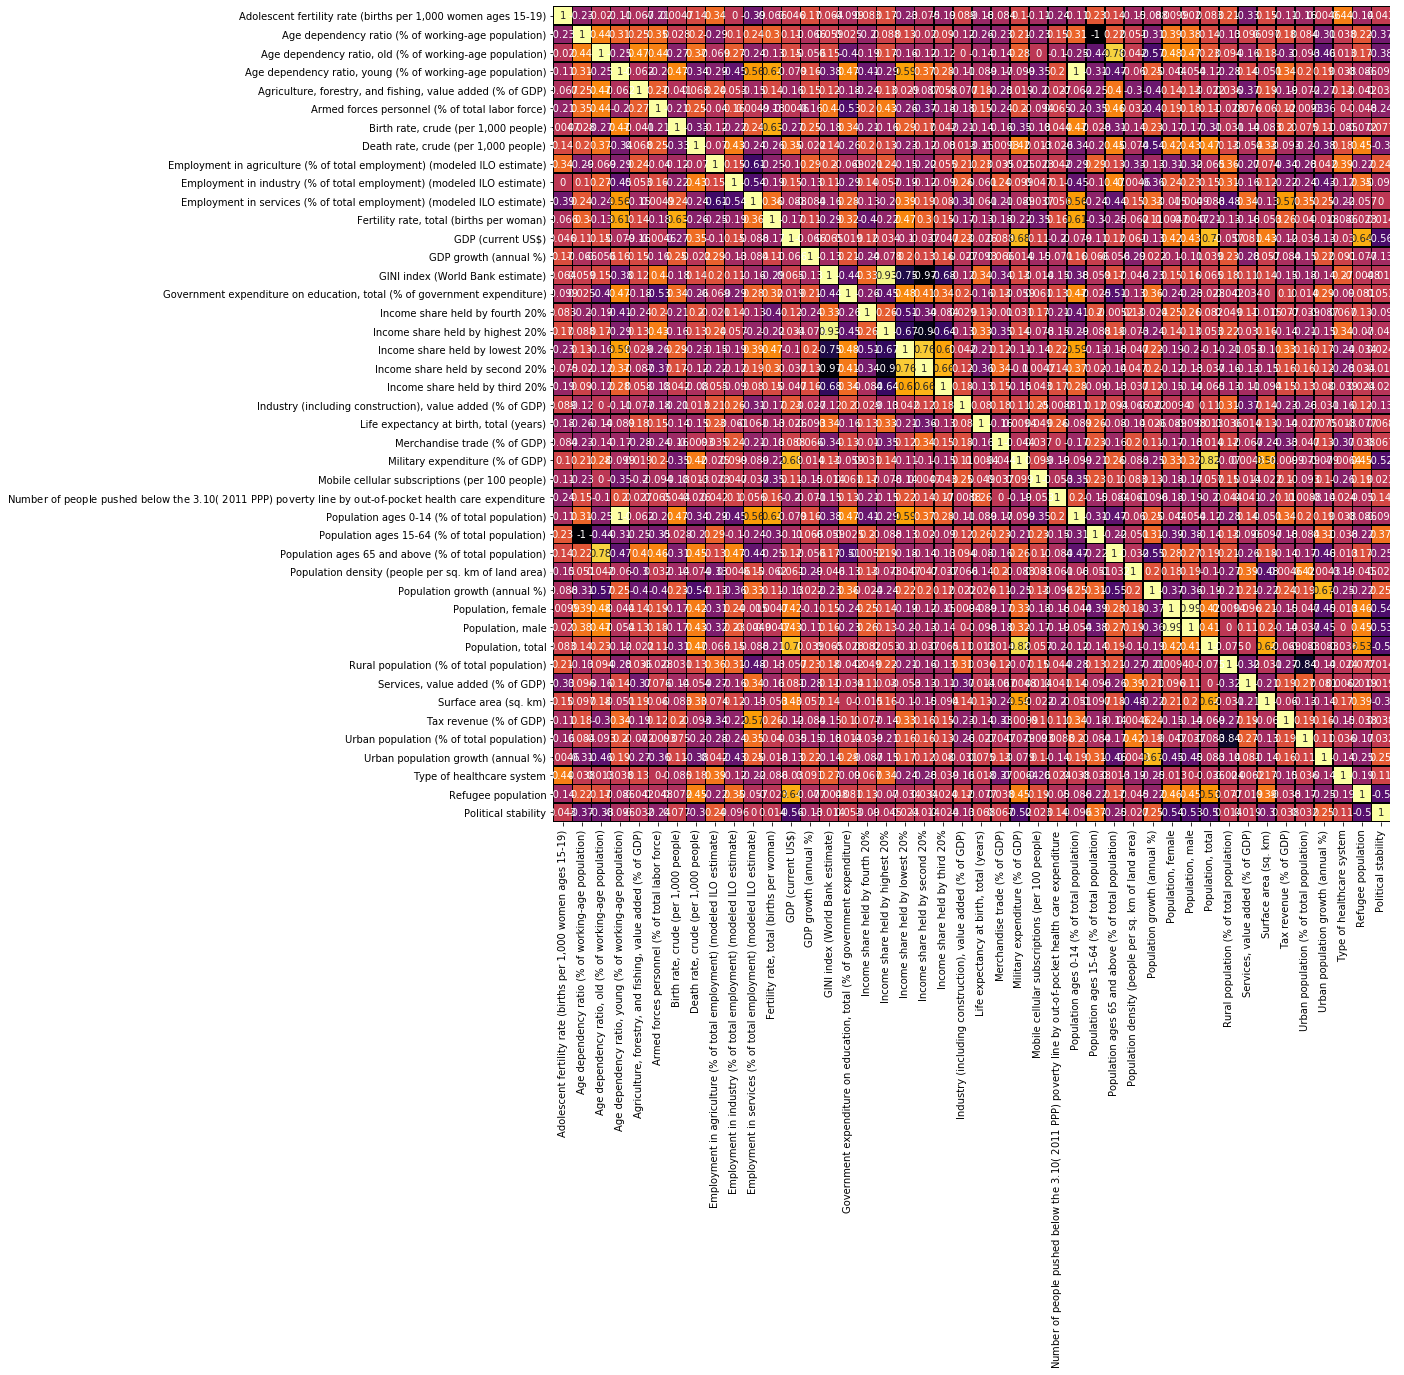

In [31]:
# specifying a file (must be in the working directory)
file = 'WE_AFTER_Imputation.xlsx'

# reading the file into Python through pandas
WE = pd.read_excel(file)

# Using palplot to view a color scheme
WE_corr = WE.corr(method ='kendall')
sns.palplot(sns.color_palette('inferno', 8))

# specifying plot size
fig, ax = plt.subplots(figsize=(15, 15))


# creating a heatmap
sns.heatmap(data = WE_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('WE_After_Imputation Correlation Heatmap.png')
plt.show()

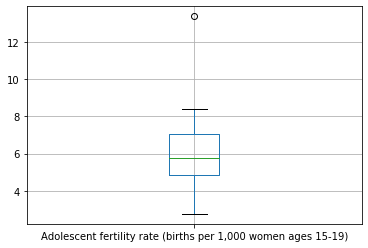

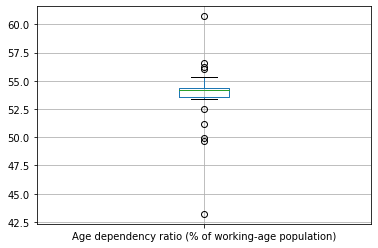

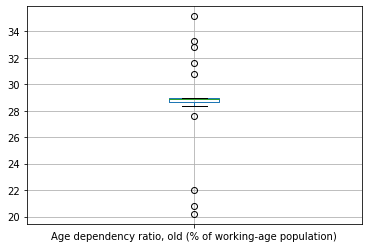

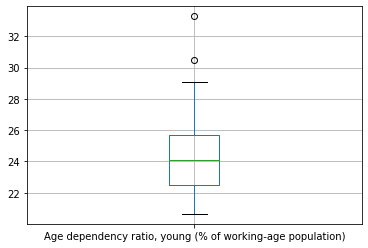

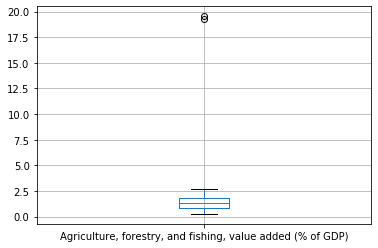

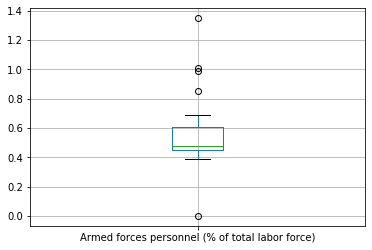

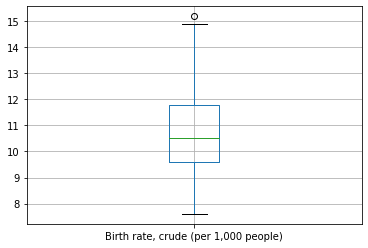

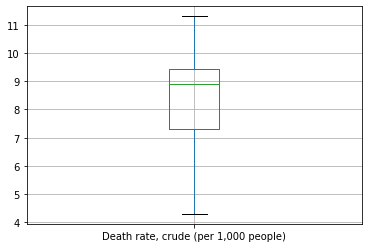

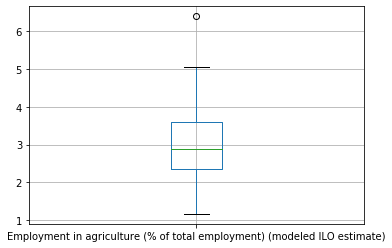

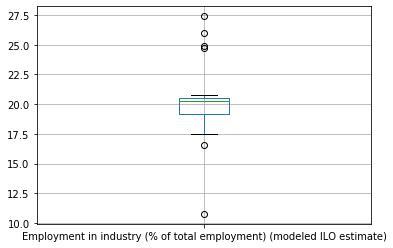

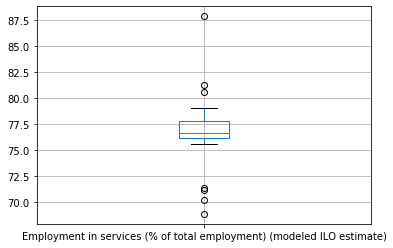

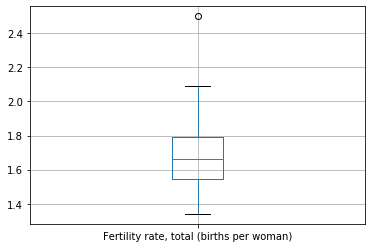

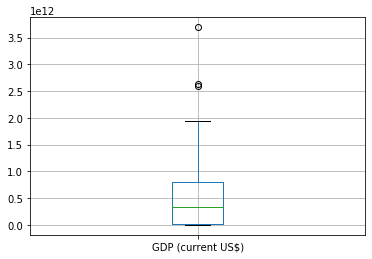

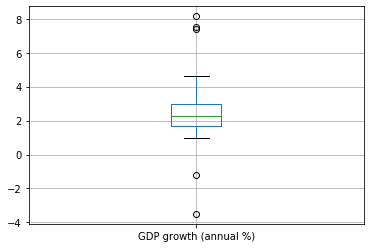

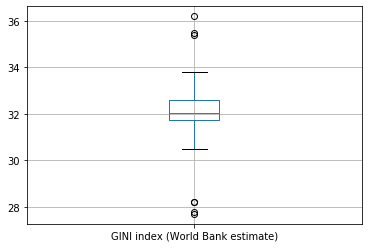

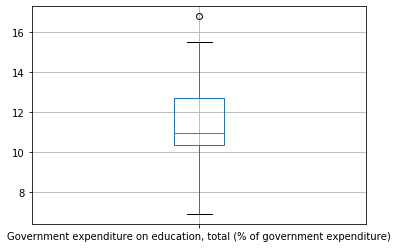

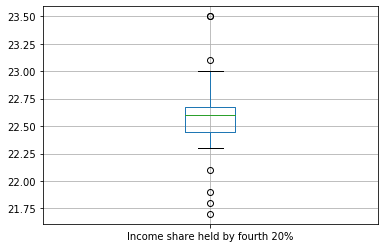

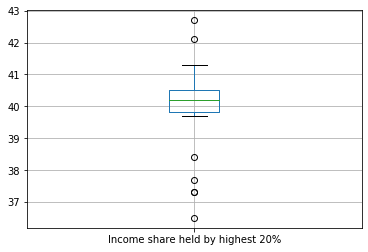

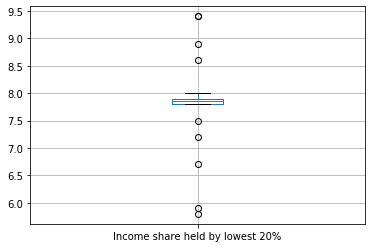

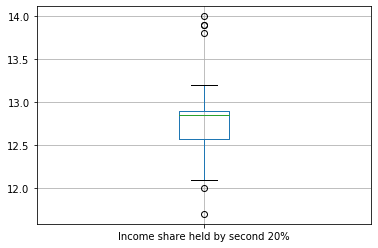

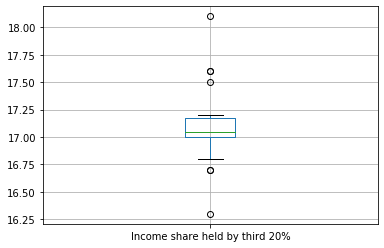

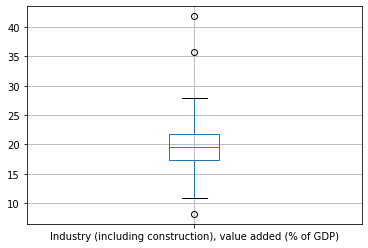

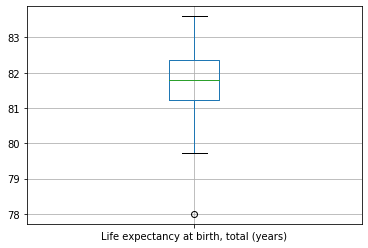

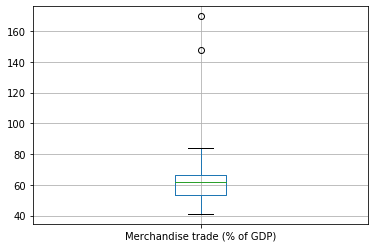

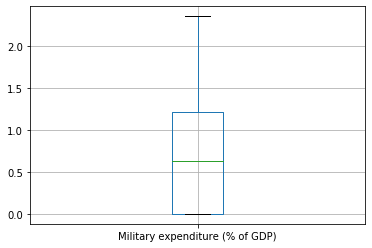

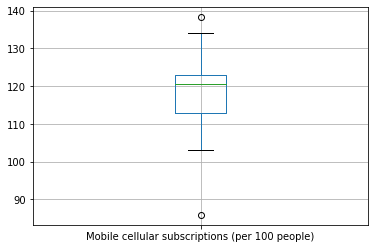

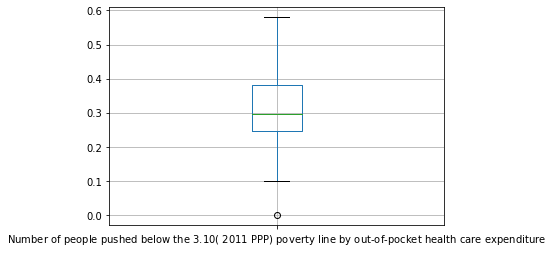

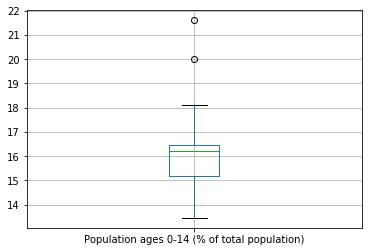

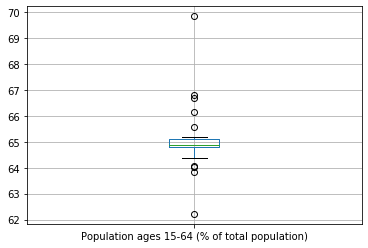

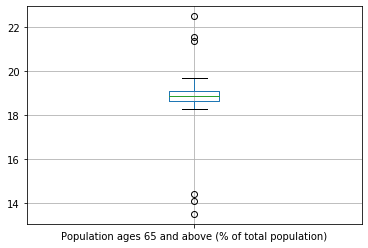

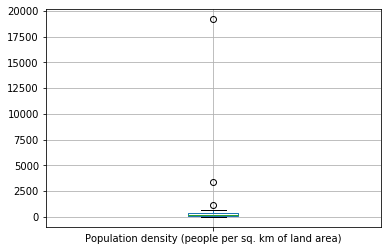

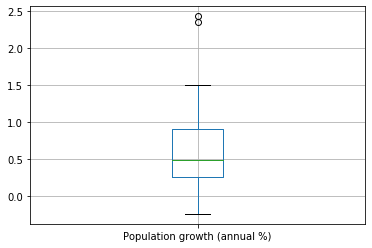

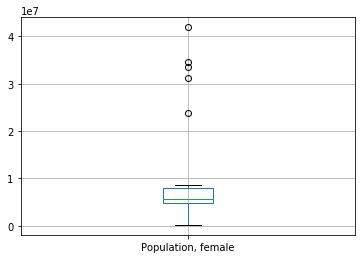

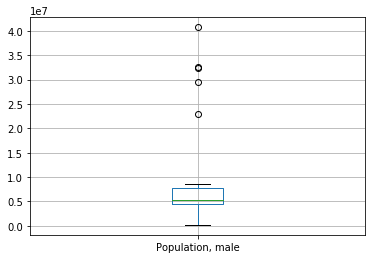

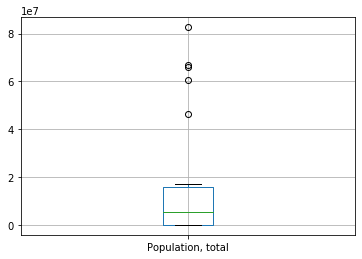

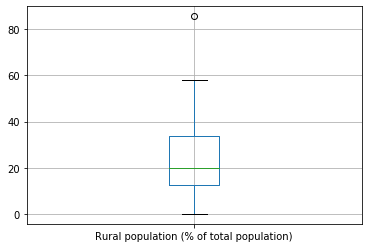

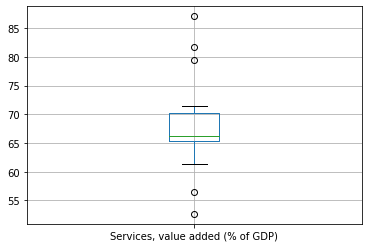

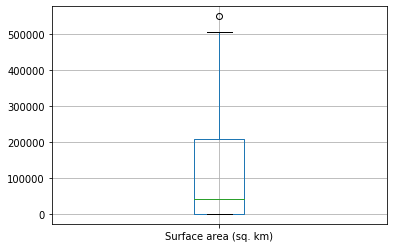

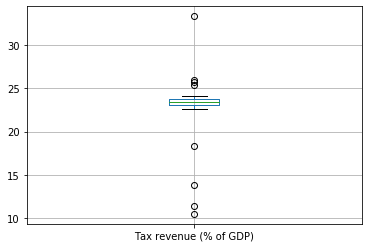

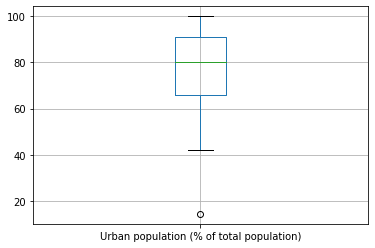

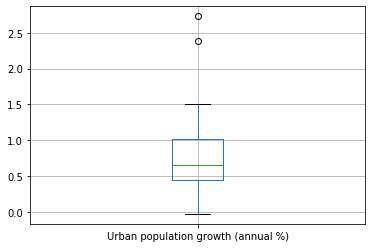

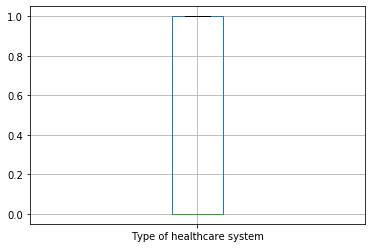

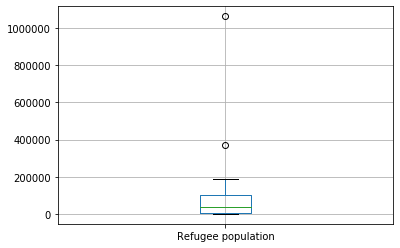

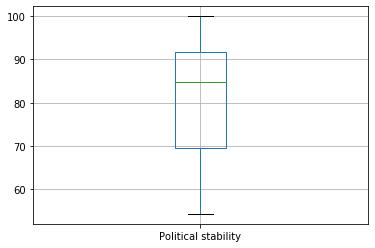

In [32]:
column_list = ["Adolescent fertility rate (births per 1,000 women ages 15-19)",
                 "Age dependency ratio (% of working-age population)",
                 "Age dependency ratio, old (% of working-age population)",
                 "Age dependency ratio, young (% of working-age population)",
                 "Agriculture, forestry, and fishing, value added (% of GDP)",
                 "Armed forces personnel (% of total labor force)",
                 "Birth rate, crude (per 1,000 people)",
                 "Death rate, crude (per 1,000 people)",
                 "Employment in agriculture (% of total employment) (modeled ILO estimate)",
                 "Employment in industry (% of total employment) (modeled ILO estimate)",
                 "Employment in services (% of total employment) (modeled ILO estimate)",
                 "Fertility rate, total (births per woman)",
                 "GDP (current US$)",
                 "GDP growth (annual %)",
                 "GINI index (World Bank estimate)",
                 "Government expenditure on education, total (% of government expenditure)",
                 "Income share held by fourth 20%",
                 "Income share held by highest 20%",
                 "Income share held by lowest 20%",
                 "Income share held by second 20%",
                 "Income share held by third 20%",
                 "Industry (including construction), value added (% of GDP)",
                 "Life expectancy at birth, total (years)",
                 "Merchandise trade (% of GDP)",
                 "Military expenditure (% of GDP)",
                 "Mobile cellular subscriptions (per 100 people)",
                 "Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure",
                 "Population ages 0-14 (% of total population)",
                 "Population ages 15-64 (% of total population)",
                 "Population ages 65 and above (% of total population)",
                 "Population density (people per sq. km of land area)",
                 "Population growth (annual %)",
                 "Population, female",
                 "Population, male",
                 "Population, total",
                 "Rural population (% of total population)",
                 "Services, value added (% of GDP)",
                 "Surface area (sq. km)",
                 "Tax revenue (% of GDP)",
                 "Urban population (% of total population)",
                 "Urban population growth (annual %)",
                 "Type of healthcare system",
                 "Refugee population",
                 "Political stability"]

for i in column_list :
    WE.boxplot(column = i)
    plt.savefig(f"{i}.png")
    
    plt.show()

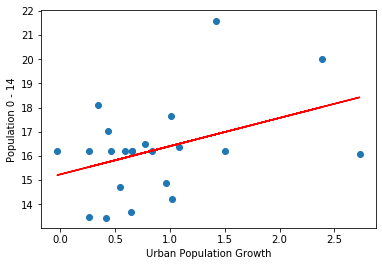

<Figure size 432x288 with 0 Axes>

In [34]:
x = WE.iloc[:,42].values.reshape(-1,1)
y = WE.iloc[:,29].values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Urban Population Growth')
plt.ylabel('Population 0 - 14')
plt.show()

plt.savefig('UPG vs Pop 0-14.png')

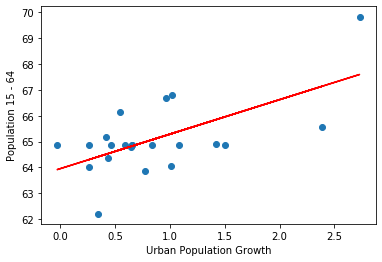

In [35]:
x = WE.iloc[:,42].values.reshape(-1,1)
y = WE.iloc[:,30].values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Urban Population Growth')
plt.ylabel('Population 15 - 64')
plt.show()

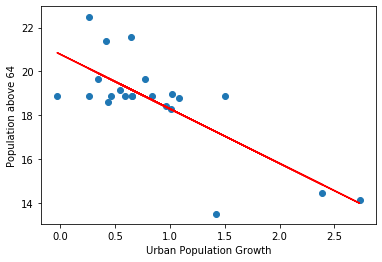

In [36]:
x = WE.iloc[:,42].values.reshape(-1,1)
y = WE.iloc[:,31].values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Urban Population Growth')
plt.ylabel('Population above 64')
plt.show()

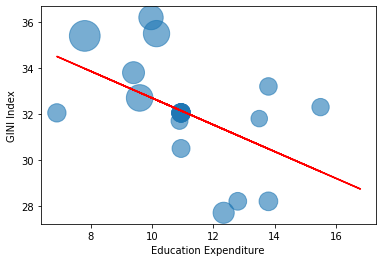

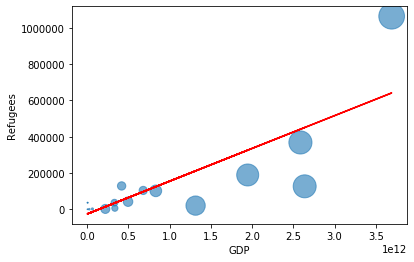

In [37]:
#PLOT OF GOV EXP vs GINI INDEX
x = WE.iloc[:,17].values.reshape(-1,1)
y = WE.iloc[:,16].values.reshape(-1,1)
z = WE.iloc[:,7].values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y, s=z*700, alpha = 0.6)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Education Expenditure')
plt.ylabel('GINI Index')
plt.show()


#PLOT OF GDP vs REFUGEES
x = WE.iloc[:,14].values.reshape(-1,1)
y = WE.iloc[:,44].values.reshape(-1,1)
z = WE.iloc[:,36].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y, s=z*0.000008, alpha = 0.6)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('GDP')
plt.ylabel('Refugees')
plt.show()

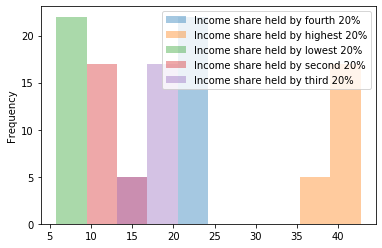

In [39]:
# reading the file into Python through pandas
WE = pd.read_excel(file)
df = pd.DataFrame.copy(WE)

df[["Income share held by fourth 20%", "Income share held by highest 20%", "Income share held by lowest 20%",
    "Income share held by second 20%", "Income share held by third 20%"]].plot.hist(alpha=0.4)

plt.show()

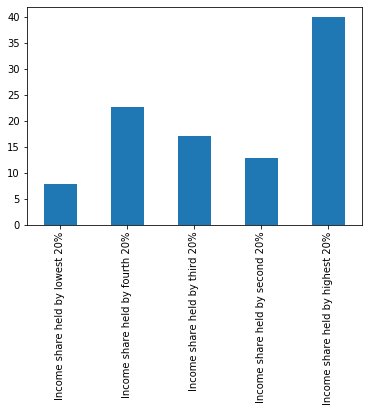

In [40]:
df[["Income share held by lowest 20%", "Income share held by fourth 20%", "Income share held by third 20%","Income share held by second 20%",
    "Income share held by highest 20%"]].mean().plot(kind="bar")
plt.savefig("Mean of Country.png")

<function matplotlib.pyplot.show(*args, **kw)>

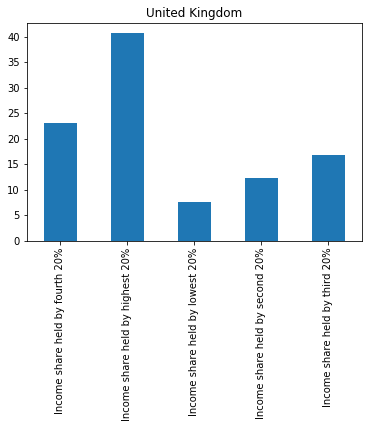

In [41]:
df.iloc[21, 18:23].plot(kind="bar")
plt.title(df.iloc[21, 1])
plt.show

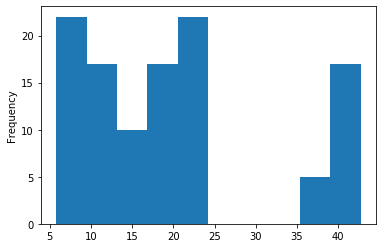

In [42]:
#x.groupby(column).mean().plot(kind='bar')

total_wealth = df.iloc[:,18]
total_wealth = total_wealth.append(df.iloc[:,19])
total_wealth = total_wealth.append(df.iloc[:,20])
total_wealth = total_wealth.append(df.iloc[:,21])
total_wealth = total_wealth.append(df.iloc[:,22])

total_wealth.plot.hist()

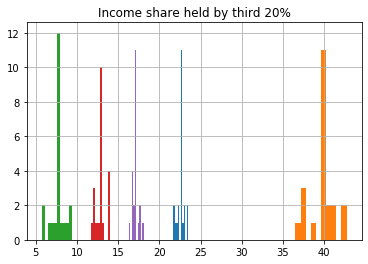

In [43]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

fig, ax = plt.subplots()

df.hist(column=['Income share held by fourth 20%'], ax=ax)
df2.hist(column=['Income share held by highest 20%'], ax=ax)
df3.hist(column=['Income share held by lowest 20%'], ax=ax)
df4.hist(column=['Income share held by second 20%'], ax=ax)
df5.hist(column=['Income share held by third 20%'], ax=ax)

plt.show()